# library Used

In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data From Excel File

In [2]:
df1 = pd.read_excel('Data - Test technique PFE 8.xlsx')
df1.head()

,id_mutation,date_mutation,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,distance_mer,prix
0,2014-871332,2014,153,4,6.484708,43.506405,NaN,275000.0
1,2014-871334,2014,90,4,6.745540,43.461693,NaN,370000.0
2,2014-871343,2014,46,3,6.836668,43.525037,NaN,302500.0
3,2014-871344,2014,117,5,6.802083,43.433279,NaN,210000.0
4,2014-871347,2014,98,4,6.483364,43.509586,NaN,280000.0


In [3]:
DF1 = df1.copy()
DF1

,id_mutation,date_mutation,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,distance_mer,prix
0,2014-871332,2014,153,4,6.484708,43.506405,NaN,275000.0
1,2014-871334,2014,90,4,6.745540,43.461693,NaN,370000.0
2,2014-871343,2014,46,3,6.836668,43.525037,NaN,302500.0
3,2014-871344,2014,117,5,6.802083,43.433279,NaN,210000.0
4,2014-871347,2014,98,4,6.483364,43.509586,NaN,280000.0
...,...,...,...,...,...,...,...,...
994,2014-877801,2014,88,4,6.033051,43.341624,NaN,493917.7
995,2014-877805,2014,32,1,5.876707,43.602998,NaN,185000.0
996,2014-877806,2014,79,4,6.691434,43.619773,NaN,225000.0
997,2014-877809,2014,50,2,6.693541,43.624888,NaN,140000.0


In [4]:
df2 = pd.read_csv('mer positions.csv')
df2.head()

,longitude,latitude,ll
0,5.670597,43.179075,0
1,5.687840,43.176488,0
2,5.690636,43.167890,0
3,5.685014,43.163261,0
4,5.683744,43.156497,0


In [5]:
DF2 = df2.copy()
DF2

,longitude,latitude,ll
0,5.670597,43.179075,0
1,5.687840,43.176488,0
2,5.690636,43.167890,0
3,5.685014,43.163261,0
4,5.683744,43.156497,0
...,...,...,...
788,6.898451,43.431278,0
789,6.901374,43.436862,0
790,6.904298,43.442445,0
791,6.915509,43.451442,0


In [6]:
# To make sure that there are no null values and All are either integers/ Float values 
DF1.info() 
print('\n XXXXXXXXXXXXXXXXXXXXXXX\n')
DF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_mutation                999 non-null    object 
 1   date_mutation              999 non-null    int64  
 2   surface_reelle_bati        999 non-null    int64  
 3   nombre_pieces_principales  999 non-null    int64  
 4   longitude                  999 non-null    float64
 5   latitude                   999 non-null    float64
 6   distance_mer               0 non-null      float64
 7   prix                       999 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB

 XXXXXXXXXXXXXXXXXXXXXXX

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  793 non-null    float64
 1   latitude   793 no

In [7]:
#fuction to calculate distance
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6378 # Radius of earth in kilometers
    return c * r

In [8]:
#multiply each row of House Dataset with all row of mer position Dataset and calculat the distance_mer 
DF1['key'] = 1
DF2['key'] = 1

df = DF1.merge(DF2,on='key')
del df['key']
df['distance_mer'] = df.apply(lambda x: haversine(x['longitude_x'],x['latitude_x'],x['longitude_y'],x['latitude_y']),axis=1)
df

,id_mutation,date_mutation,surface_reelle_bati,nombre_pieces_principales,longitude_x,latitude_x,distance_mer,prix,longitude_y,latitude_y,ll
0,2014-871332,2014,153,4,6.484708,43.506405,75.308826,275000.0,5.670597,43.179075,0
1,2014-871332,2014,153,4,6.484708,43.506405,74.233532,275000.0,5.687840,43.176488,0
2,2014-871332,2014,153,4,6.484708,43.506405,74.520209,275000.0,5.690636,43.167890,0
3,2014-871332,2014,153,4,6.484708,43.506405,75.175912,275000.0,5.685014,43.163261,0
4,2014-871332,2014,153,4,6.484708,43.506405,75.652506,275000.0,5.683744,43.156497,0
...,...,...,...,...,...,...,...,...,...,...,...
792202,2014-877816,2014,108,4,6.045601,43.327445,69.963217,120000.0,6.898451,43.431278,0
792203,2014-877816,2014,108,4,6.045601,43.327445,70.298350,120000.0,6.901374,43.436862,0
792204,2014-877816,2014,108,4,6.045601,43.327445,70.638157,120000.0,6.904298,43.442445,0
792205,2014-877816,2014,108,4,6.045601,43.327445,71.711188,120000.0,6.915509,43.451442,0


In [9]:
#get the id_mutation with the minimum distance_mer
df = df.loc[df.groupby("id_mutation")["distance_mer"].idxmin()]
df.head()

,id_mutation,date_mutation,surface_reelle_bati,nombre_pieces_principales,longitude_x,latitude_x,distance_mer,prix,longitude_y,latitude_y,ll
763,2014-871332,2014,153,4,6.484708,43.506405,23.375221,275000.0,6.741429,43.409610,0
1558,2014-871334,2014,90,4,6.745540,43.461693,4.866144,370000.0,6.753707,43.418383,0
2378,2014-871343,2014,46,3,6.836668,43.525037,9.312024,302500.0,6.929988,43.475887,0
3149,2014-871344,2014,117,5,6.802083,43.433279,2.155978,210000.0,6.803585,43.413942,0
3935,2014-871347,2014,98,4,6.483364,43.509586,23.635811,280000.0,6.741429,43.409610,0


In [11]:
df.shape

(999, 11)

# Analyze the data

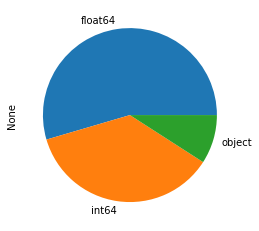

In [12]:
df.dtypes.value_counts().plot.pie()

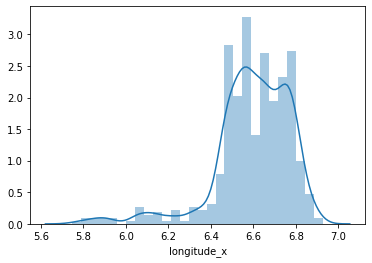

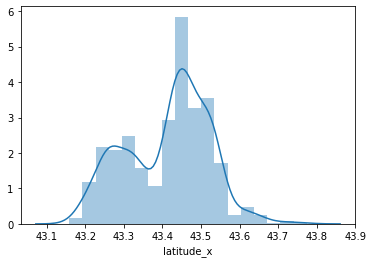

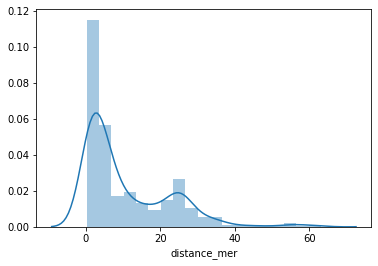

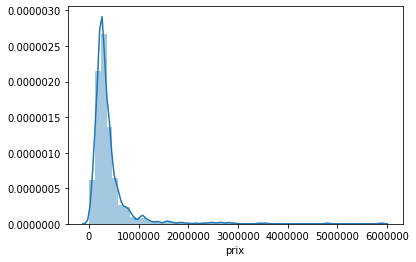

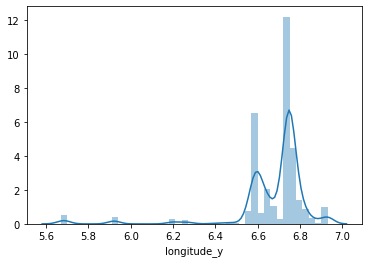

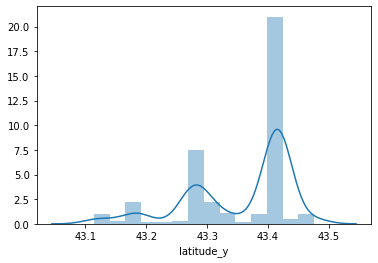

In [13]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

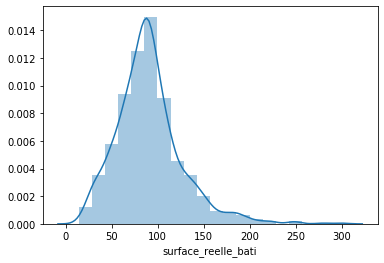

In [14]:
sns.distplot(df['surface_reelle_bati'], bins=20)

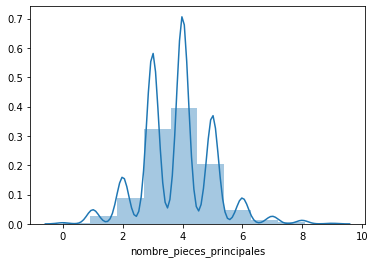

In [15]:
sns.distplot(df['nombre_pieces_principales'], bins=10)

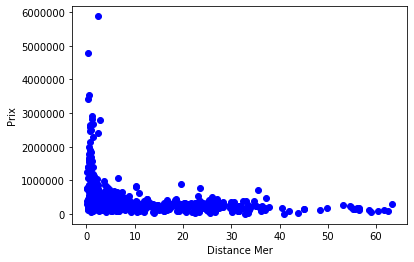

In [16]:
plt.scatter(df.distance_mer, df.prix,  color='blue')
plt.xlabel("Distance Mer")
plt.ylabel("Prix")
plt.show()

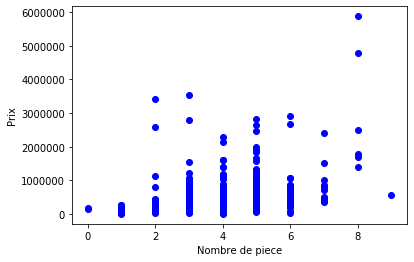

In [17]:
plt.scatter(df.nombre_pieces_principales, df.prix,  color='blue')
plt.xlabel("Nombre de piece")
plt.ylabel("Prix")
plt.show()

In [18]:
df = df.drop('ll', axis=1)

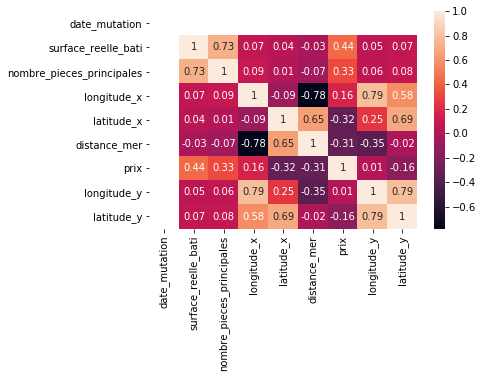

In [19]:
matrice_corr = df.corr().round(2)
sns.heatmap(data=matrice_corr, annot=True)

# Feature selection

In [20]:
df_x = df[["date_mutation", "surface_reelle_bati", "nombre_pieces_principales", "longitude_x", "latitude_x", "distance_mer", "longitude_y", "latitude_y"]]
df_y = df[["prix"]]

# Modellistation

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=1)

In [23]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[       0.             6028.58956159    -6126.54106495   529950.7363392
   -352185.00073733    -1711.39206607   263491.48175584 -1693010.46193719]]
Intercept:  [83344624.5357625]


In [25]:
y_pred = regr.predict(X_test)
print(y_pred)

[[ 468790.96426174]
 [ 654089.81222066]
 [ 524188.71070918]
 [ 433593.65696871]
 [ 468155.09643242]
 [ 281527.21146393]
 [ 459522.32819244]
 [ 428282.13597041]
 [ 347778.79551546]
 [ 886194.88467224]
 [ 568837.86905837]
 [ 423236.11171025]
 [  80483.59864441]
 [ 455693.1159552 ]
 [ 540642.96844989]
 [ 764536.61536801]
 [ 426803.40308191]
 [ 570615.87138066]
 [ 628202.63325197]
 [ 172805.0024236 ]
 [ 553436.34882133]
 [ 177692.64188431]
 [ 545074.6063821 ]
 [ 175991.25758812]
 [ 974600.78990202]
 [ 380334.07184753]
 [ 459130.82669275]
 [ 347778.79551546]
 [ 210784.55388887]
 [ 467989.77019423]
 [ 150516.0390664 ]
 [ 428924.03742456]
 [ 314478.78725764]
 [ 566142.52588621]
 [ 338953.58012663]
 [ 289648.32592024]
 [ 312101.12284322]
 [ 198050.00678074]
 [ 214432.4260314 ]
 [ 505184.62842409]
 [ 202109.56148097]
 [  60413.77429391]
 [1500636.90082738]
 [ 204041.39357997]
 [  82992.6254352 ]
 [ 417563.4749378 ]
 [ 240972.79003739]
 [ 497572.06641142]
 [ 540984.41327265]
 [ 177998.25052439]


In [26]:
print(y_test)

            prix
402817  430000.0
482909  440200.0
359183  495000.0
292588  190000.0
192698  401300.0
...          ...
341754  290000.0
466228  185000.0
436915  395000.0
482122  340000.0
164915  171000.0

[200 rows x 1 columns]


# Evaluation procedure

In [27]:
print("Residual sum of squares: %.2f"
      % np.mean((y_pred - y_test) ** 2))

Residual sum of squares: 57640101494.44


In [30]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred, y_test))

57640101494.442986


In [50]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Variance score: 0.12
